In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Housing.csv")

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.shape

(545, 13)

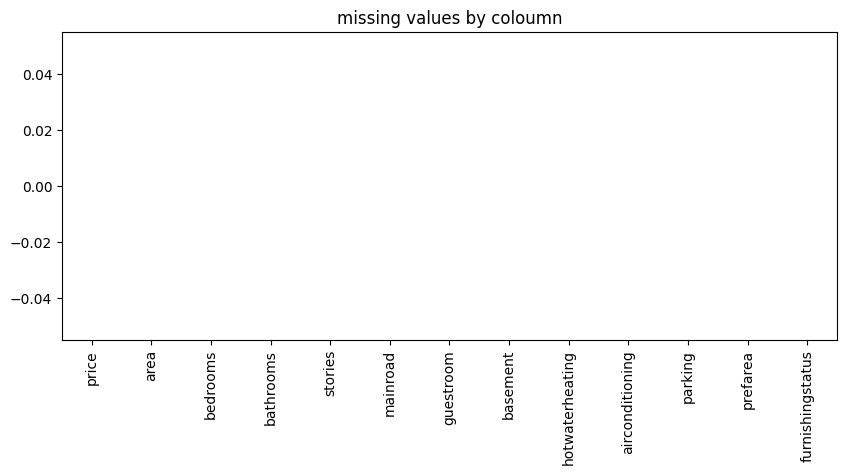

In [16]:
missing = df.isnull().sum()
missing = missing[missing >=0]
missing.plot(kind = "bar", figsize = (10,4), title = "missing values by coloumn", color = "blue")
plt.show()

In [25]:
nums_cols = df.select_dtypes(include = ["int64","float64"]).columns
df[nums_cols] = df[nums_cols].fillna(df[nums_cols].median())

In [26]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [29]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [30]:
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)


In [32]:
df.isnull().sum()
df.shape
# should show 0 after validation

(545, 13)

In [33]:
print("Before cleaning shape:", df.shape)
print("After cleaning shape:", df.shape)
# comparison of data sets

Before cleaning shape: (545, 13)
After cleaning shape: (545, 13)


In [34]:
df.to_csv("cleaned_dataset.csv", index=False)
# saved cleaned dataset

In [ ]:
## Observations
- no columns contained missing values.
- Numerical columns were imputed using median.
- Categorical columns were imputed using mode.
- Columns with excessive missing values were removed.
- Dataset quality improved after cleaning.